In [ ]:
#Luyao Wang, Di Jin, Yingqi Lin

In [1]:
#get dataset---array
from numpy import*

def LoadDataSet(filename):
    global dataset_ls
    File = open(filename, 'r').readlines()
    dataset =[]
    for line in File:
        stringlist = line.strip('\n').split(',')
        stringlist[0]=float(stringlist[0])
        stringlist[1]=float(stringlist[1])
        dataset.append(stringlist)
    dataset_ls=dataset
    return array(dataset)


In [2]:
#get random ric
import numpy as np
def random_ric():
    random_ric_M=np.random.randint(10,size=(150,3))
    return random_ric_M


In [3]:
#normalize function--get ric_M
from numpy import*

def normalize(random_ric_M):
    ric_M=np.zeros((150, 3))
    ric_M[:,0]=random_ric_M[:,0]/random_ric_M.sum(axis=0)[0]
    ric_M[:,1]=random_ric_M[:,1]/random_ric_M.sum(axis=0)[1]
    ric_M[:,2]=random_ric_M[:,2]/random_ric_M.sum(axis=0)[2]
    return ric_M


In [4]:
from numpy import*
#recompute Mu based on current ric_M
def update_mu(dataset,ric_M):
    Mu = np.zeros((3, 2))
    for i in [0,1,2]:
        Mu[i] = np.average(dataset, axis=0, weights=ric_M[:, i])
    return Mu
#recompute var based on current ric_M
def update_var(dataset,ric_M,Mu):
    var = np.zeros((3, 2))
    for i in [0,1,2]:
        var[i] = np.average((dataset - Mu[i]) ** 2, axis=0, weights=ric_M[:, i])
    return var


In [5]:
#update pai based on current ric_M
def update_pai(ric_M):
    pai = ric_M.sum(axis=0) / ric_M.sum()
    return pai


In [6]:
from scipy.stats import multivariate_normal
# recomputer ric_M based on current Mu,var,pai
def update_ric_M(dataset,Mu,var,pai):
    R = np.zeros(((150, 3)))
    for i in [0,1,2]:
        R[:, i]=pai[i] * multivariate_normal.pdf(dataset, Mu[i], np.diag(var[i]))
    ric_M= R/R.sum(axis=1).reshape(-1, 1)
    return ric_M


In [7]:
#calculate log--decide when to stop 
def logLH(dataset, pai, Mu, var):
    n_clusters = 3 #column
    n_points = 150 #row
    R = np.zeros(((n_points, n_clusters)))#build an empty 150*3array
    for i in range(n_clusters):
        R[:, i] = pai[i] * multivariate_normal.pdf(dataset, Mu[i], np.diag(var[i]))
    return np.mean(np.log(R.sum(axis=1)))


In [11]:
#主函数
import numpy as np
def GMM():
    # get data
    dataset=LoadDataSet('clusters.txt')
    #initialize ric
    random_ric_M=random_ric()
    ric_M=normalize(random_ric_M)
    #initialize parameters
    pai=update_pai(ric_M)
    Mu=update_mu(dataset,ric_M)
    var=update_var(dataset,ric_M,Mu)
    
    count=0
    log=0
    #recompute
    while count<1000:
        #M
        before_log=log
        ric_M=update_ric_M(dataset,Mu,var,pai)
        #E:
        Mu=update_mu(dataset,ric_M)
        var=update_var(dataset,ric_M,Mu)
        pai=update_pai(ric_M)
        log = logLH(dataset, pai, Mu, var)
        #end conditions
        if abs(log-before_log)<0.001:
            return Mu,var,pai,ric_M
        else:
            count+=1
    return Mu,var,pai,ric_M
    

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

#visualize result
def plot_clusters(dataset, Mu, var):
    colors = ['b', 'g', 'r']
    n_clusters = 3
    plt.figure(figsize=(10, 8))
    plt.axis([-10, 15, -5, 15])
    plt.scatter(dataset[:, 0], dataset[:, 1], s=5)
    ax = plt.gca()
    for i in range(n_clusters):
        plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'ls': ':'}
        ellipse = Ellipse(Mu[i], 3 * var[i][0], 3 * var[i][1], **plot_args)
        ax.add_patch(ellipse)         
    plt.show()


Mu:
 [[ 5.25049585  4.50338157]
 [ 1.42465616  1.23970279]
 [-0.98239332 -0.94902025]] 
Covariance Matrix:
 [[2.34021713 2.75953961]
 [5.10969402 2.17307382]
 [1.134117   1.37844617]] 
Amplitude:
 [0.28400152 0.23720799 0.47879049] 



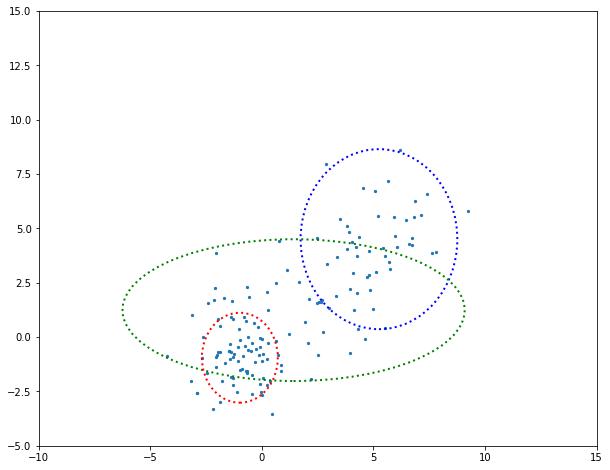

In [13]:
#run    
Mu,var,pai,ric_M=GMM() 
print('Mu:\n',Mu,'\nCovariance Matrix:\n',var,'\nAmplitude:\n',pai,'\n')
dataset=LoadDataSet('clusters.txt')
plot_clusters(dataset, Mu, var)